In [1]:
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout
from keras.layers import LSTM, SimpleRNN
from keras.datasets import imdb
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm

2022-12-04 17:45:55.258749: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-04 17:45:55.417578: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-04 17:45:55.417597: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-04 17:45:55.444874: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-04 17:45:56.106980: W tensorflow/stream_executor/platform/de

In [2]:
max_features = 20000
batch_size = 32
max_len = 80

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

In [3]:
model_layers_dict = {}
for regularization in [None, "l1", "l2"]:
    model_layers_dict[regularization] = [
        Embedding(max_features, 16),
        SimpleRNN(16, input_shape=(max_features,max_len), kernel_regularizer=regularization),
        Dropout(0.1),
        Dense(1, activation='sigmoid'),
    ]

models = {}

for k, v in model_layers_dict.items():
    model = Sequential(v)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
    models[k] = model
    print(k)
    model.summary()

None
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 16)                528       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 320,545
Trainable params: 320,545
Non-trainable params: 0
_________________________________________________________________


2022-12-04 17:46:00.528771: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-04 17:46:00.528794: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-04 17:46:00.528824: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (kamilasproska-VivoBook-ASUSLaptop-X515UA-M515UA): /proc/driver/nvidia/version does not exist
2022-12-04 17:46:00.529123: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


l1
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 16)          320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 320,545
Trainable params: 320,545
Non-trainable params: 0
_________________________________________________________________
l2
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedd

In [4]:
history_dict = {}
for k, model in tqdm(models.items()):
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=5, validation_data=(x_test, y_test))
    history_dict[k] = history

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1/5
782/782 [==============================] - 18s 21ms/step - loss: 0.4791 - accuracy: 0.7656 - val_loss: 0.4274 - val_accuracy: 0.8039
Epoch 2/5
782/782 [==============================] - 21s 27ms/step - loss: 0.3040 - accuracy: 0.8784 - val_loss: 0.3932 - val_accuracy: 0.8274
Epoch 3/5
782/782 [==============================] - 27s 35ms/step - loss: 0.2182 - accuracy: 0.9187 - val_loss: 0.4579 - val_accuracy: 0.7910
Epoch 4/5
782/782 [==============================] - 27s 35ms/step - loss: 0.1453 - accuracy: 0.9486 - val_loss: 0.4783 - val_accuracy: 0.8178
Epoch 5/5
782/782 [==============================] - 26s 33ms/step - loss: 0.0972 - accuracy: 0.9666 - val_loss: 0.6093 - val_accuracy: 0.8118


 33%|███▎      | 1/3 [01:59<03:58, 119.17s/it]

Epoch 1/5
782/782 [==============================] - 26s 32ms/step - loss: 0.7020 - accuracy: 0.6894 - val_loss: 0.4403 - val_accuracy: 0.8180
Epoch 2/5
782/782 [==============================] - 25s 32ms/step - loss: 0.3725 - accuracy: 0.8584 - val_loss: 0.4191 - val_accuracy: 0.8216
Epoch 3/5
782/782 [==============================] - 25s 32ms/step - loss: 0.2838 - accuracy: 0.9007 - val_loss: 0.4708 - val_accuracy: 0.8032
Epoch 4/5
782/782 [==============================] - 25s 32ms/step - loss: 0.2379 - accuracy: 0.9214 - val_loss: 0.4611 - val_accuracy: 0.8190
Epoch 5/5
782/782 [==============================] - 25s 32ms/step - loss: 0.2069 - accuracy: 0.9362 - val_loss: 0.5379 - val_accuracy: 0.8092


 67%|██████▋   | 2/3 [04:05<02:03, 123.18s/it]

Epoch 1/5
782/782 [==============================] - 24s 31ms/step - loss: 0.5488 - accuracy: 0.7554 - val_loss: 0.4176 - val_accuracy: 0.8231
Epoch 2/5
782/782 [==============================] - 23s 29ms/step - loss: 0.3276 - accuracy: 0.8742 - val_loss: 0.4173 - val_accuracy: 0.8205
Epoch 3/5
782/782 [==============================] - 25s 31ms/step - loss: 0.2522 - accuracy: 0.9106 - val_loss: 0.4132 - val_accuracy: 0.8264
Epoch 4/5
782/782 [==============================] - 25s 32ms/step - loss: 0.1983 - accuracy: 0.9342 - val_loss: 0.4927 - val_accuracy: 0.8198
Epoch 5/5
782/782 [==============================] - 25s 32ms/step - loss: 0.1552 - accuracy: 0.9519 - val_loss: 0.5096 - val_accuracy: 0.8174


100%|██████████| 3/3 [06:07<00:00, 122.41s/it]


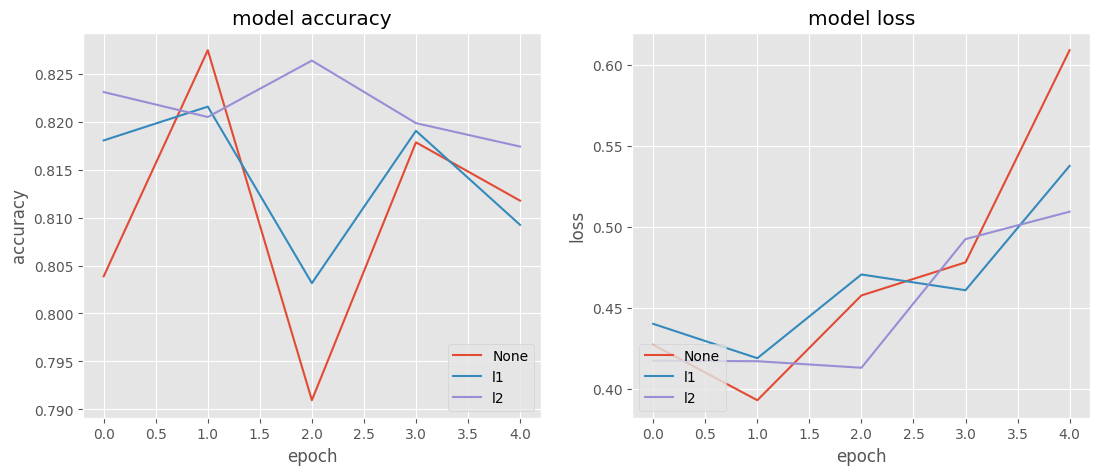

In [5]:
plt.style.use('ggplot')
fig, axis = plt.subplots(1, 2)
fig.set_size_inches(13, 5)

for k, history in history_dict.items():
    plt.sca(axis[0])
    plt.plot(history.history['val_accuracy'], label=str(k))
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(loc='lower right')

    plt.sca(axis[1])
    plt.plot(history.history['val_loss'], label=str(k))
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(loc='lower left')
plt.savefig(f'plots/'+ " ".join([str(x) for x in models.keys()]) + '.png');